In [2]:
from google.colab  import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
file_path = '/content/drive/MyDrive/US_Accidents_March23.csv'
df= pd.read_csv(file_path)
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
# Q1. How many unique values are there in categorical columns like City, State, and Weather_Condition? Which category is the most frequent in each?
columns = ["City", "State", "Weather_Condition"]
summary_list = []

for col in columns:
    counts = df[col].value_counts()
    summary_list.append({
        "Column": col,
        "Unique Count": df[col].nunique(),
        "Top Category": counts.index[0],
        "Top Frequency": counts.iloc[0]
    })

summary_df = pd.DataFrame(summary_list)
print(summary_df)

              Column  Unique Count Top Category  Top Frequency
0               City         13678        Miami         186917
1              State            49           CA        1741433
2  Weather_Condition           144         Fair        2560802


In [6]:
#Q2. Calculate the percentage of missing values in each column and list columns with more than 5% missing data.
total_rows = len(df)
missing_info= []

for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_prct = (missing_count / total_rows) * 100

    if missing_prct > 5:
        missing_info.append({
            "Column": col,
            "Missing Count": missing_count,
            "Percent Missing": round(missing_prct, 2)
        })

missing_df = pd.DataFrame(missing_info).sort_values(by="Percent Missing", ascending=False)

print("Columns with more than 5% missing data:\n")
print(missing_df)


Columns with more than 5% missing data:

              Column  Missing Count  Percent Missing
0            End_Lat        3402762            44.03
1            End_Lng        3402762            44.03
4  Precipitation(in)        2203586            28.51
2      Wind_Chill(F)        1999019            25.87
3    Wind_Speed(mph)         571233             7.39


In [7]:
# Q3.Convert Start_Time and End_Time columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.

for col in ["Start_Time", "End_Time"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")

time_range = df["Start_Time"].agg(["min", "max"])

print(f"Accident Start Time Range:\nFrom: {time_range['min']}\nTo:   {time_range['max']}")


Accident Start Time Range:
From: 2016-01-14 20:18:33
To:   2023-03-31 23:30:00


In [8]:
#Q4.Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?

dup_count = df.duplicated().sum()
print(f"Total duplicate rows: {dup_count}")

if dup_count:
    print("\nPreview of duplicates:")
    print (df[df.duplicated()].head())

    df = df.drop_duplicates().reset_index(drop=True)
    print("\nDuplicates removed. New dataset shape:", df.shape)
else:
    print("\nNo duplicate rows found.")


Total duplicate rows: 0

No duplicate rows found.


Accident Severity Distribution (in %):

Severity
2    79.67
3    16.81
4     2.65
1     0.87
Name: proportion, dtype: float64


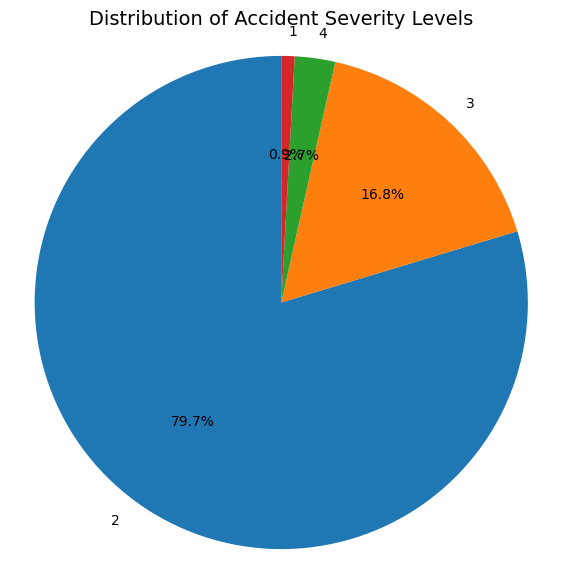

In [11]:
#Q5.Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.
import matplotlib.pyplot as plt
severity_pct = df["Severity"].value_counts(normalize=True).mul(100).round(2)

print("Accident Severity Distribution (in %):\n")
print(severity_pct)

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(severity_pct, labels=severity_pct.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Accident Severity Levels", fontsize=14)
plt.axis('equal')  # ensures pie chart is a circle
plt.show()
